# Crop Price Prediction using NeuralProphet

Dataset from -> [here](https://www.data.gov.in/resource/variety-wise-daily-market-prices-data-commodity)

Current model training config

        * Market -> Udumalpet
        * Commodity -> Coconut


## Prerequisites

Install it in the same order as below
 
        * torch <= 2.5.1
        * neuralprophet
        * plotly-resampler

## Data Loading and EDA

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [2]:
df = pd.read_csv('data.csv')
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
0,Tamil Nadu,Coimbatore,Anaimalai,Coconut,Coconut,FAQ,26/08/2014,760.0,1548,1230.0,138
1,Tamil Nadu,Coimbatore,Anaimalai,Coconut,Coconut,FAQ,27/08/2014,760.0,1542,1235.0,138
2,Tamil Nadu,Coimbatore,Anaimalai,Coconut,Coconut,FAQ,28/08/2014,760.0,1548,1230.0,138
3,Tamil Nadu,Coimbatore,Anaimalai,Coconut,Coconut,FAQ,30/08/2014,760.0,1548,1230.0,138
4,Tamil Nadu,Coimbatore,Anaimalai,Coconut,Coconut,FAQ,04/09/2014,760.0,1630,1345.0,138


In [3]:
df = df[df['Market']=='Udumalpet']

coco = df[df['Commodity']=='Coconut']
coco['Arrival_Date'] = pd.to_datetime(coco['Arrival_Date'], dayfirst=True)

coco.head()

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_89195/2708936133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coco['Arrival_Date'] = pd.to_datetime(coco['Arrival_Date'], dayfirst=True)



,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
213412,Tamil Nadu,Coimbatore,Udumalpet,Coconut,Other,FAQ,2014-02-08,700.0,1000,850.0,138
213413,Tamil Nadu,Coimbatore,Udumalpet,Coconut,Other,FAQ,2014-02-11,700.0,1000,850.0,138
213414,Tamil Nadu,Coimbatore,Udumalpet,Coconut,Other,FAQ,2014-02-17,700.0,1000,850.0,138
213415,Tamil Nadu,Coimbatore,Udumalpet,Coconut,Other,FAQ,2014-02-18,700.0,1000,850.0,138
213416,Tamil Nadu,Coimbatore,Udumalpet,Coconut,Other,FAQ,2014-10-09,900.0,1600,1250.0,138


In [4]:
coco.dtypes

State                     object
District                  object
Market                    object
Commodity                 object
Variety                   object
Grade                     object
Arrival_Date      datetime64[ns]
Min_Price                float64
Max_Price                  int64
Modal_Price              float64
Commodity_Code             int64
dtype: object

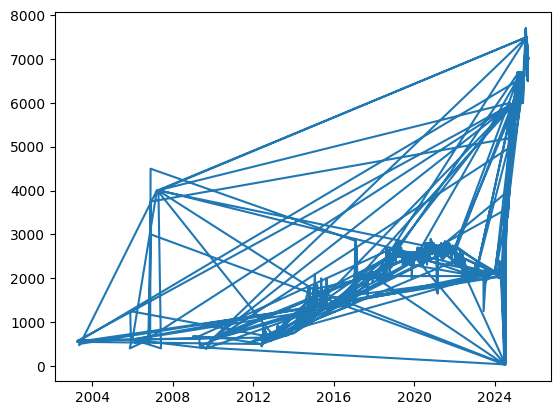

In [5]:
plt.plot(coco['Arrival_Date'], coco['Modal_Price'])

In [6]:
coco.tail()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
244470,Tamil Nadu,Coimbatore,Udumalpet,Coconut,Coconut,Local,2025-07-11,7000.0,7500,7500.0,138
244471,Tamil Nadu,Coimbatore,Udumalpet,Coconut,Coconut,Local,2025-07-13,7000.0,7700,7700.0,138
244472,Tamil Nadu,Coimbatore,Udumalpet,Coconut,Coconut,Local,2025-08-19,6000.0,6500,6500.0,138
244473,Tamil Nadu,Coimbatore,Udumalpet,Coconut,Coconut,Local,2025-07-25,7000.0,7500,7500.0,138
244474,Tamil Nadu,Coimbatore,Udumalpet,Coconut,Coconut,Local,2025-08-25,6500.0,7000,7000.0,138


In [7]:
data = coco[['Arrival_Date','Modal_Price']]
data.dropna(inplace=True)
data.columns = ['ds','y']
data.tail()

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_89195/1305154960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
244470,2025-07-11,7500.0
244471,2025-07-13,7700.0
244472,2025-08-19,6500.0
244473,2025-07-25,7500.0
244474,2025-08-25,7000.0


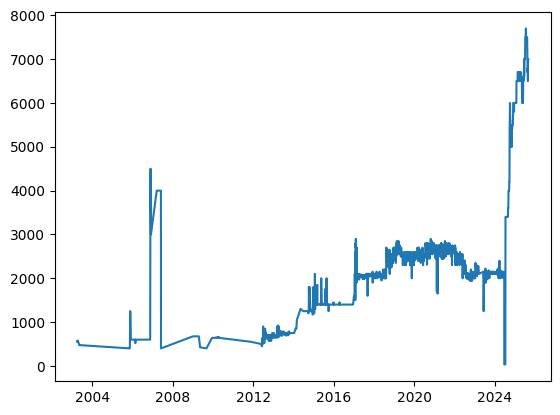

In [8]:
# Sort the data by date before plotting
data = data.sort_values(by='ds')

plt.plot(data['ds'], data['y'])
plt.show()

## Model Training

In [9]:
# Check duplicates
dupes = data[data['ds'].duplicated(keep=False)]
print("Number of duplicates:", len(dupes))
dupes.head(20)

Number of duplicates: 2


,ds,y
239406,2024-06-18,2010.0
223756,2024-06-18,33.0


In [10]:
# Drop row with index 223756
data = data.drop(index=223756)


In [11]:
m = NeuralProphet(
    accelerator="gpu"
)
m.fit(data, freq='D', epochs=1000, batch_size=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  if df.groupby("ID").apply(lambda x: x.duplicated("ds").any()).any():

WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_

Training: |                                               | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (4) is too small than the required number                     for the learning rate finder (239). The results might not be optimal.


Finding best initial lr:   0%|          | 0/239 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1000. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 788. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |                                               | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.892304,0.0,7122.133301,8938.234375,0.891259,0.0,0
1,0.862895,0.0,6933.291992,8708.793945,0.863892,0.0,1
2,0.834534,0.0,6711.579590,8453.183594,0.832150,0.0,2
3,0.806065,0.0,6527.535645,8227.151367,0.806301,0.0,3
4,0.778809,0.0,6333.425293,7997.604004,0.778678,0.0,4
...,...,...,...,...,...,...,...
995,0.035604,0.0,591.927734,941.212036,0.035527,0.0,995
996,0.035602,0.0,591.129456,941.576050,0.035502,0.0,996
997,0.035602,0.0,591.389526,940.510559,0.035534,0.0,997
998,0.035602,0.0,591.199768,941.645386,0.035509,0.0,998


## Future Predictions

In [12]:
future = m.make_future_dataframe(data, periods = 1000)

forecast = m.predict(future)
forecast.head()

WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 86.404% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtyp

Predicting: |                                             | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2025-08-29,None,4236.220703,4341.865234,-88.433952,-17.210667
1,2025-08-30,None,4293.786133,4342.982910,-92.277336,43.080917
2,2025-08-31,None,4277.283203,4344.099609,-95.859200,29.042601
3,2025-09-01,None,4227.436523,4345.216797,-99.161507,-18.618715
4,2025-09-02,None,4231.595703,4346.334473,-102.167305,-12.571686


In [13]:
forecast.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly
995,2028-05-20,None,5507.463867,5453.317383,11.112700,43.033531
996,2028-05-21,None,5491.349609,5454.434082,7.893498,29.021942
997,2028-05-22,None,5441.422363,5455.551758,4.515501,-18.644602
998,2028-05-23,None,5445.115234,5456.668457,0.976613,-12.529757
999,2028-05-24,None,5432.766113,5457.785156,-2.730760,-22.288069


In [14]:
plot1 = m.plot(forecast)
plot1

WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:98: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '2c372abc-52ca-47f1-b133-51661f0634fa',
              'x': array([datetime.datetime(2025, 8, 29, 0, 0),
                          datetime.datetime(2025, 8, 30, 0, 0),
                          datetime.datetime(2025, 8, 31, 0, 0), ...,
                          datetime.datetime(2028, 5, 22, 0, 0),
                          datetime.datetime(2028, 5, 23, 0, 0),
                          datetime.datetime(2028, 5, 24, 0, 0)], dtype=object),
              'y': array([4236.2207, 4293.786 , 4277.283 , ..., 5441.4224, 5445.115 , 5432.766 ],
                         dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid':

In [15]:
plot2 = m.plot_components(forecast)
plot2

WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': '05bc65e1-4748-4cfb-b608-09d8caf36bbb',
              'x': array([datetime.datetime(2025, 8, 29, 0, 0),
                          datetime.datetime(2025, 8, 30, 0, 0),
                          datetime.datetime(2025, 8, 31, 0, 0), ...,
                          datetime.datetime(2028, 5, 22, 0, 0),
                          datetime.datetime(2028, 5, 23, 0, 0),
                          datetime.datetime(2028, 5, 24, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([4341.865 , 4342.983 , 4344.0996, ..., 5455.552 , 5456.6685, 5457.785 ],
                         dtype=float32),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly seasonality

## Model Saving

In [16]:
import torch
torch.save(m.model.state_dict(), "np_model.pt")



state_dict = torch.load("np_model.pt")
m.model.load_state_dict(state_dict)

# Now you can use it for forecasting
fut = m.make_future_dataframe(data, periods=10)
fore = m.predict(fut)


WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_89195/1119174743.py:6: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


WARNING - (py.warnings._showwarnmsg) - /home/nnma

Predicting: |                                             | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [17]:
fut.head()

,ds,y
0,2025-08-29,None
1,2025-08-30,None
2,2025-08-31,None
3,2025-09-01,None
4,2025-09-02,None


In [18]:
fore.head()

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2025-08-29,None,4236.220703,4341.865234,-88.433952,-17.210667
1,2025-08-30,None,4293.786133,4342.982910,-92.277336,43.080917
2,2025-08-31,None,4277.283203,4344.099609,-95.859200,29.042601
3,2025-09-01,None,4227.436523,4345.216797,-99.161507,-18.618715
4,2025-09-02,None,4231.595703,4346.334473,-102.167305,-12.571686


In [20]:
plot_forecast = m.plot(fore)
plot_forecast

WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:98: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '0b20c1c3-62fb-407c-9dad-e6c036d55095',
              'x': array([datetime.datetime(2025, 8, 29, 0, 0),
                          datetime.datetime(2025, 8, 30, 0, 0),
                          datetime.datetime(2025, 8, 31, 0, 0),
                          datetime.datetime(2025, 9, 1, 0, 0),
                          datetime.datetime(2025, 9, 2, 0, 0),
                          datetime.datetime(2025, 9, 3, 0, 0),
                          datetime.datetime(2025, 9, 4, 0, 0),
                          datetime.datetime(2025, 9, 5, 0, 0),
                          datetime.datetime(2025, 9, 6, 0, 0),
                          datetime.datetime(2025, 9, 7, 0, 0)], dtype=object),
              'y': array([4236.2207, 4293.786 , 4277.283 , 4227.4365,

In [21]:
plot_comp = m.plot_components(fore)
plot_comp

WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - /home/nnmax/.local/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': '128005b5-2233-485d-88ca-fb1b17a8e239',
              'x': array([datetime.datetime(2025, 8, 29, 0, 0),
                          datetime.datetime(2025, 8, 30, 0, 0),
                          datetime.datetime(2025, 8, 31, 0, 0),
                          datetime.datetime(2025, 9, 1, 0, 0),
                          datetime.datetime(2025, 9, 2, 0, 0),
                          datetime.datetime(2025, 9, 3, 0, 0),
                          datetime.datetime(2025, 9, 4, 0, 0),
                          datetime.datetime(2025, 9, 5, 0, 0),
                          datetime.datetime(2025, 9, 6, 0, 0),
                          datetime.datetime(2025, 9, 7, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([4341.865 , 4342.983 , 4344